# Data Analist

## Importing libraries

In [690]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 

import plotly as py
import datetime


## Importing csv file

In [28]:
data = pd.read_excel('multiPages.xlsx')

In [31]:
# data.head()

## Feature Enginering

### Which year made the most top rated anime

In [62]:
years = np.arange(198,203,1).tolist()

for year in years:
    patternY = str(year)

    yearMask = data['AirDate'].str.contains(patternY)
    anime_Year = (data[yearMask])

    print('Top animes in decade', patternY, '\b0 :' , len(anime_Year))

Top animes in decade 1980 : 10
Top animes in decade 1990 : 27
Top animes in decade 2000 : 94
Top animes in decade 2010 : 250
Top animes in decade 2020 : 115


In [55]:
infoMonth = []
# If not like this, its sorted alphabeticly[Apr-Sep]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']

for month in months:
    patternM = (month)
    monthMask = data['AirDate'].str.contains(patternM)
    anime_Month = (data[monthMask])

    print('Number animes in', patternM,' :' ,len(anime_Month))
    # print(strMonth)
    infoMonth.append(anime_Month)   ## To find the dataframe acc. to month index

# (list(multiPage.AirDate.groupby(multiPage.AirDate.dt.year)))


Number animes in Jan  : 79
Number animes in Feb  : 19
Number animes in Mar  : 17
Number animes in Apr  : 110
Number animes in May  : 5
Number animes in Jun  : 7
Number animes in Jul  : 63
Number animes in Aug  : 24
Number animes in Sep  : 27
Number animes in Oct  : 106
Number animes in Nov  : 15
Number animes in Dec  : 28


## Only TV shows

In [724]:
dataTV = data.loc[data.Type == 'TV'].copy()

In [929]:
# dataTV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 499
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Rank              300 non-null    int64         
 1   Title             300 non-null    object        
 2   Rating            300 non-null    float64       
 3   Type              300 non-null    object        
 4   AirDate_dt        300 non-null    datetime64[ns]
 5   EndDate           294 non-null    object        
 6   TotalEpi          300 non-null    object        
 7   Members           300 non-null    int64         
 8   MAL Ref           300 non-null    int64         
 9   Status            300 non-null    object        
 10  Premiered         300 non-null    object        
 11  Broadcast         300 non-null    object        
 12  Studio            300 non-null    object        
 13  Duration          300 non-null    object        
 14  Age Ratingn       300 non-

### Months 
AirDates

Formatting

In [730]:
cols_org = ['Rank', 'Title', 'Rating', 'Type', 'AirDate', 'EndDate', 'TotalEpi',
       'Members', 'MAL Ref', 'Status', 'Premiered', 'Broadcast', 'Studio',
       'Duration', 'Age Ratingn', 'Genres', 'Producer', 'Source']

# dataTV = dataTV.drop(columns='AirDate')


dataTV['AirDate_dt'] = pd.to_datetime(dataTV.AirDate, infer_datetime_format=True)
# dataTV['AirDate_year'] = pd.to_datetime(dataTV.AirDate,infer_datetime_format=True)

# dataTV.AirDate_month[:4]


dataTV = dataTV[['Rank', 'Title', 'Rating', 'Type', 'AirDate_dt', 'EndDate', 'TotalEpi',
                'Members', 'MAL Ref', 'Status', 'Premiered', 'Broadcast', 'Studio',
                'Duration', 'Age Ratingn', 'Genres', 'Producer', 'Source']]



In [798]:
# dataTV.AirDate_dt.astype('datetime64[ns]')
# dataTV.AirDate_dt.dt.month_name().value_counts().sort_index()

Number anmies in Jan : 61
Number anmies in Feb : 1
Number anmies in Mar : 1
Number anmies in Apr : 88
Number anmies in May : 2
Number anmies in Jun : 3
Number anmies in Jul : 43
Number anmies in Aug : 2
Number anmies in Sep : 1
Number anmies in Oct : 92
Number anmies in Nov : 2
Number anmies in Dec : 4


<Axes: title={'center': 'Months the top 500 animes were released'}, xlabel='Months', ylabel='Counts'>

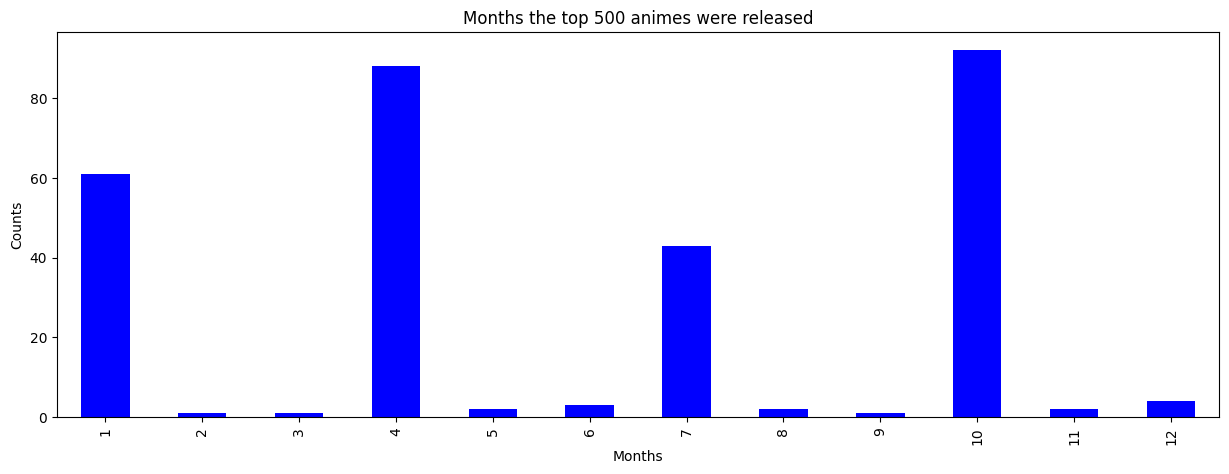

In [803]:
monthCount = dataTV.AirDate_dt.dt.month.value_counts().sort_index()

j=0
for i in monthCount:
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']
    print(f'Number anmies in {months[j]} : {i}')
    j=j+1


monthCount.plot(kind='bar',
                xlabel='Months', 
                ylabel='Counts',
            
                title='Months the top 500 animes were released',
                color = 'blue',
                # rot=90 ##Rotate x value names,
                figsize=(15,5)
                  )


# dataTV.AirDate_dt.dt.year.value_counts().sort_index()

Number anmies in Jan : 61
Number anmies in Feb : 1
Number anmies in Mar : 1
Number anmies in Apr : 88
Number anmies in May : 2
Number anmies in Jun : 3
Number anmies in Jul : 43
Number anmies in Aug : 2
Number anmies in Sep : 1
Number anmies in Oct : 92
Number anmies in Nov : 2
Number anmies in Dec : 4


<Axes: title={'center': 'Months the top 500 animes were released'}, xlabel='Months', ylabel='Counts'>

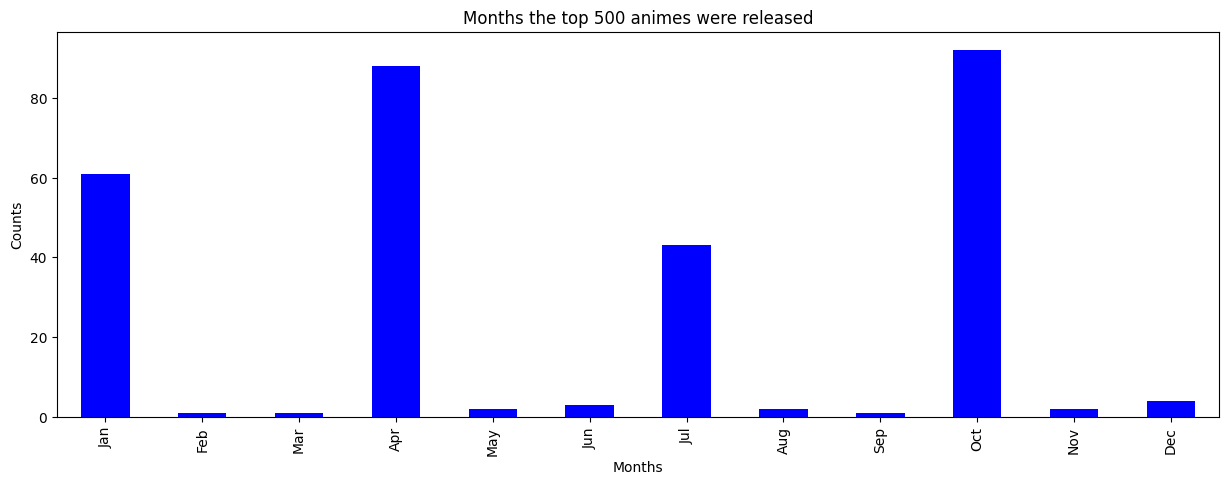

In [666]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct', 'Nov', 'Dec']

monthsCounts = dataTV.AirDate.str.split(' ').str[0].value_counts()

for i in months:
    print(f'Number anmies in {i} : {monthsCounts[i]}')


#--------------------

monthsCounts[months].plot(kind='bar',
                          xlabel='Months', 
                          ylabel='Counts',
                          title='Months the top 500 animes were released',
                          color = 'blue',
                        # rot=90 ##Rotate x value names,
                        figsize=(15,5)
                          )


As we can see from the graph and and printed data, most top animes was released in year quaters.

In [649]:
py.plot(kind='bar',
        data_frame=monthsCounts[months])

### Seasons

In [589]:
# dataTV.Premiered

infoPremired = []

seasons = ['Spring', 'Fall ', 'Summer', 'Winter']

for element in seasons:
    patternS = element

    seasonMask = dataTV.Premiered.str.contains(patternS)
    anime_Season = dataTV[seasonMask]

    print('Number animes in', patternS,' :' ,len(anime_Season))




Number animes in Spring  : 91
Number animes in Fall   : 96
Number animes in Summer  : 48
Number animes in Winter  : 65


Number animes in Fall:    96
Number animes in Spring:  91
Number animes in Winter:  65
Number animes in Summer:  48


Text(0, 0.5, 'Total top animes released')

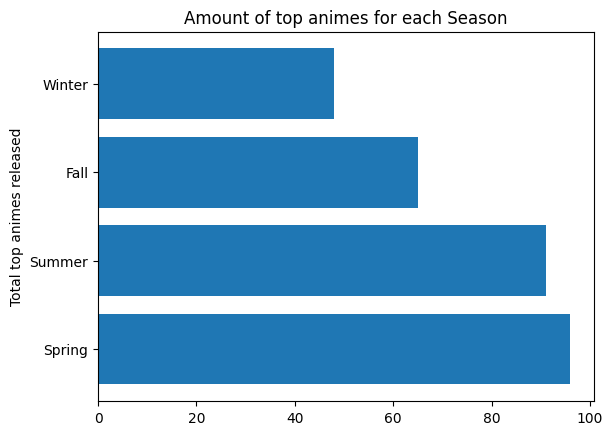

In [821]:
### USE THIS WAY FROM NOW


seasonsNew = dataTV.Premiered.str.split(' ').str[0].value_counts()

print('Number animes in Fall:   ', seasonsNew[0])
print('Number animes in Spring: ', seasonsNew[1])
print('Number animes in Winter: ', seasonsNew[2])
print('Number animes in Summer: ', seasonsNew[3])


plt.barh(['Spring', 'Summer', 'Fall', 'Winter'], seasonsNew)
plt.title('Amount of top animes for each Season')
plt.ylabel('Total top animes released')

In [824]:
dataTV['Premiered_Season'] =dataTV.Premiered.str.split(' ').str[0]

In [925]:
grouped = dataTV.groupby(['Premiered_Season', 'Broadcast'])

grouped

In [928]:
grouped[['Status','Age Ratingn']].first()


### Season Years

<Axes: >

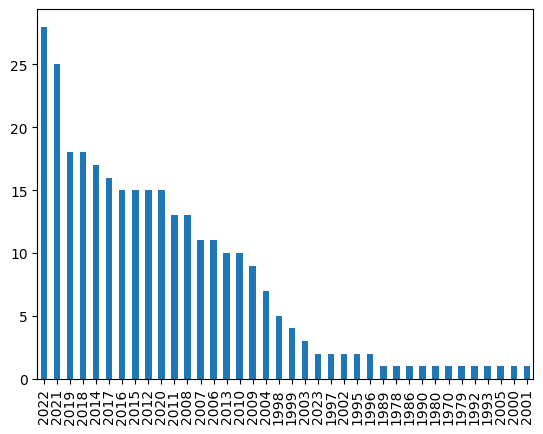

In [611]:
yearCounts = dataTV.Premiered.str.split().str[1].value_counts()


yearCounts.plot.bar()

In [930]:
years = dataTV.AirDate_dt.dt.year

# years.groupby(by=None)

### Ratings 

Average rating for Spring:  8.39
Average rating for Summer:  8.34
Average rating for Fall:    8.4
Average rating for Winter:  8.39


(7.0, 9.0)

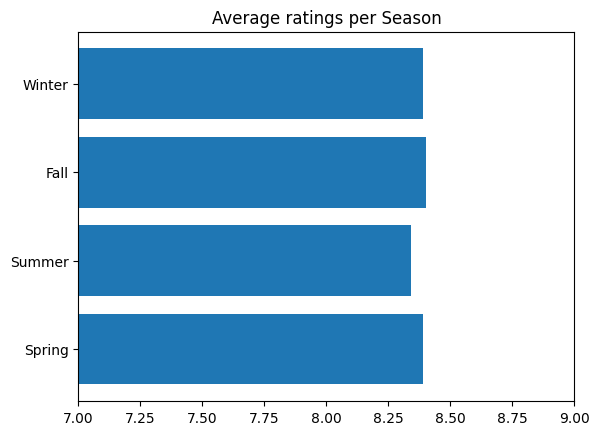

In [404]:
spring_avr = (round(dataTV[spring].Rating.mean(),2))
summer_avr = (round(dataTV[summer].Rating.mean(),2))
fall_avr   = (round(dataTV[fall].Rating.mean(),2))
winter_avr = (round(dataTV[winter].Rating.mean(),2))

print('Average rating for Spring: ', spring_avr)
print('Average rating for Summer: ', summer_avr)
print('Average rating for Fall:   ', fall_avr)
print('Average rating for Winter: ', winter_avr)


plt.title('Average ratings per Season')
plt.barh(seasons, [spring_avr,summer_avr,fall_avr,winter_avr])
plt.xlim(7,9)

In [347]:
# dataTV[dataTV.Premiered.str.contains('Spring')]

# dataTV[spring].Studio.value_counts()

# dataTV.Premiered.str.contains('2009')

### Broadcasts

<Axes: >

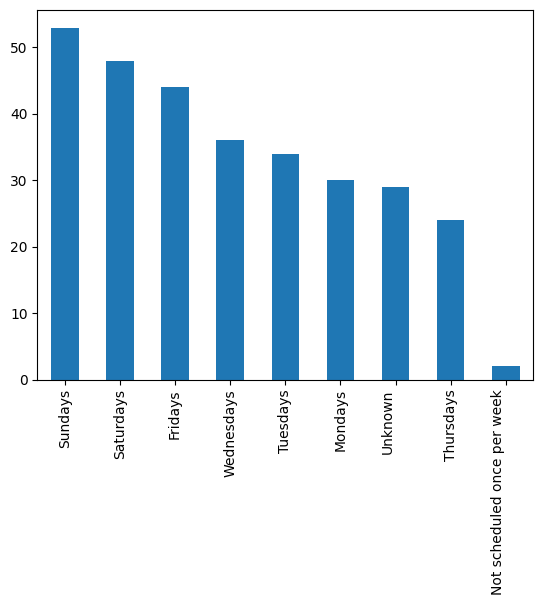

In [428]:
## Airing Days

dataTV.Broadcast.value_counts().plot.bar()

### Studios

In [585]:
dataTV.Studio.value_counts()

Madhouse                    27
Production I.G              22
J.C.Staff                   16
Bones                       15
A-1 Pictures                15
Sunrise                     13
Wit Studio                  10
Brain's Base                10
Pierrot                      9
TMS Entertainment            9
Shaft                        9
Kyoto Animation              7
ufotable                     7
MAPPA                        7
White Fox                    7
Studio Deen                  7
SynergySP                    6
Lerche                       6
Bandai Namco Pictures        6
Toei Animation               5
CloverWorks                  5
David Production             4
feel.                        4
Hal Film Maker               4
OLM                          4
Artland                      4
8bit                         4
P.A. Works                   4
Studio Hibari                3
TROYCA                       3
Kinema Citrus                3
Nippon Animation             3
A.C.G.T.

### Age Ratings

Text(0.5, 1.0, 'Age Rating Counts')

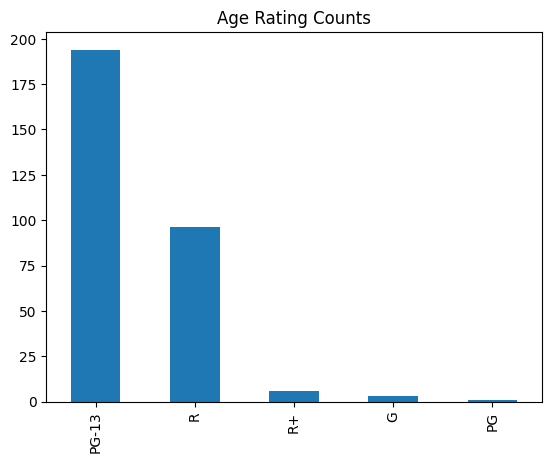

In [452]:
dataTV['Age Ratingn'].value_counts().plot.bar()

plt.title('Age Rating Counts')
# plt.grid()

In [942]:
dataTV['Age Ratingn'].value_counts()

PG-13    194
R         96
R+         6
G          3
PG         1
Name: Age Ratingn, dtype: int64

In [957]:
dataTV.groupby('Age Ratingn').count()


,Rank,Title,Rating,Type,AirDate_dt,EndDate,TotalEpi,Members,MAL Ref,Status,Premiered,Broadcast,Studio,Duration,Genres,Producer,Source,Premiered_Season
Age Ratingn,,,,,,,,,,,,,,,,,,
G,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
PG,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
PG-13,194,194,194,194,194,190,194,194,194,194,194,194,194,194,194,194,194,194
R,96,96,96,96,96,94,96,96,96,96,96,96,96,96,96,96,96,96
R+,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


### Generes

Fix after running other code again

In [ ]:
dataTV.Genres[5]

"['Action', 'Action', 'Drama', 'Drama']"

In [ ]:
dataTV.Genres[:].str.split(",")[5][::2]

["['Action'", " 'Drama'"]

### Producers

<Axes: >

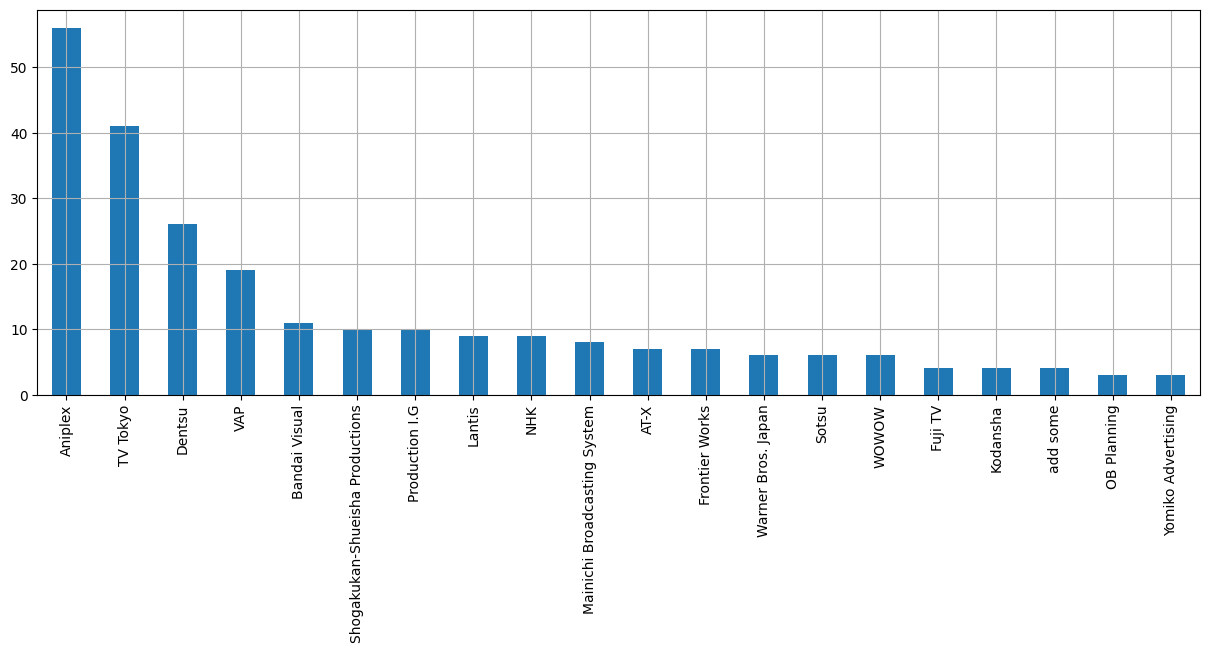

In [475]:
dataTV.Producer.value_counts()[:20].plot(kind='bar', figsize=(15,5), grid=True)

### Source

<Axes: >

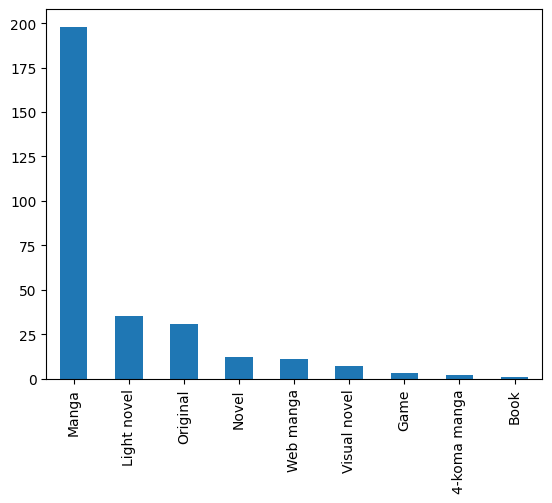

In [473]:
dataTV.Source.value_counts().plot(kind='bar')

### Dunno Yet

In [ ]:
fig = plt.figure(figsize=(8,8))

plt.matshow(corr)

## Only Movies

In [932]:
data.loc[data.Type == 'Movie']


,Rank,Title,Rating,Type,AirDate,EndDate,TotalEpi,Members,MAL Ref,Status,Premiered,Broadcast,Studio,Duration,Age Ratingn,Genres,Producer,Source
6,7,Gintama: The Final,9.05,Movie,Jan 2021,Jan 2021,1,124969,39486,Finished Airing,NaN,NaN,Bandai Namco Pictures,1 hr. 44 min,PG-13,"['Action', 'Action', 'Comedy', 'Comedy', 'Dram...",TV Tokyo,Manga
13,14,Kaguya-sama wa Kokurasetai: First Kiss wa Owar...,8.97,Movie,Dec 2022,Dec 2022,1,94851,52198,Finished Airing,NaN,NaN,A-1 Pictures,1 hr. 36 min,PG-13,"['Comedy', 'Comedy', 'Drama', 'Drama', 'Romanc...",Aniplex,Manga
17,18,Koe no Katachi,8.94,Movie,Sep 2016,Sep 2016,1,2132019,28851,Finished Airing,NaN,NaN,Kyoto Animation,2 hr. 10 min,PG-13,"['Award Winning', 'Award Winning', 'Drama', 'D...",Shochiku,Manga
19,20,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,8.92,Movie,Jul 2013,Jul 2013,1,224094,15335,Finished Airing,NaN,NaN,Sunrise,1 hr. 50 min,PG-13,"['Action', 'Action', 'Comedy', 'Comedy', 'Sci-...",TV Tokyo,Manga
21,22,Violet Evergarden Movie,8.91,Movie,Sep 2020,Sep 2020,1,519260,37987,Finished Airing,NaN,NaN,Kyoto Animation,2 hr. 20 min,PG-13,"['Award Winning', 'Award Winning', 'Drama', 'D...",Shochiku,Light novel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,481,Stand By Me Doraemon,8.08,Movie,Aug 2014,Aug 2014,1,49367,21469,Finished Airing,NaN,NaN,Shirogumi,1 hr. 34 min,PG,"['Comedy', 'Comedy', 'Sci-Fi', 'Sci-Fi']",Toho,Manga
481,482,Ginga Eiyuu Densetsu: Arata naru Tatakai no Ov...,8.08,Movie,Dec 1993,Dec 1993,1,32564,3016,Finished Airing,NaN,NaN,Kitty Film Mitaka Studio,1 hr. 30 min,PG-13,"['Action', 'Action', 'Drama', 'Drama', 'Sci-Fi...",Kitty Films,Novel
489,490,Detective Conan Movie 08: Magician of the Silv...,8.07,Movie,Apr 2004,Apr 2004,1,53398,1367,Finished Airing,NaN,NaN,TMS Entertainment,1 hr. 48 min,PG-13,"['Adventure', 'Adventure', 'Comedy', 'Comedy',...",add some,Manga
490,491,Detective Conan Movie 18: The Sniper from Anot...,8.07,Movie,Apr 2014,Apr 2014,1,40312,21419,Finished Airing,NaN,NaN,TMS Entertainment,1 hr. 50 min,PG-13,"['Action', 'Action', 'Mystery', 'Mystery']",add some,Manga
